In [62]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = [20., 5.]
matplotlib.rcParams["font.size"] = "16"
matplotlib.rcParams["lines.linewidth"] = "3"
matplotlib.rcParams["axes.grid"] = True

df = pd.read_csv('sliding_friction.csv')
df = df.abs()

series = {}
for key in df:
    series[key] = df[key].values.tolist()
    
    
for key in series:
    
    new_s = []
    # Filter data before start of experiment
    for d in series[key]:
        if d >= 0.5:
            new_s.append(d)
    series[key] = new_s
    
for key in series:
    series[key] = np.array(series[key])

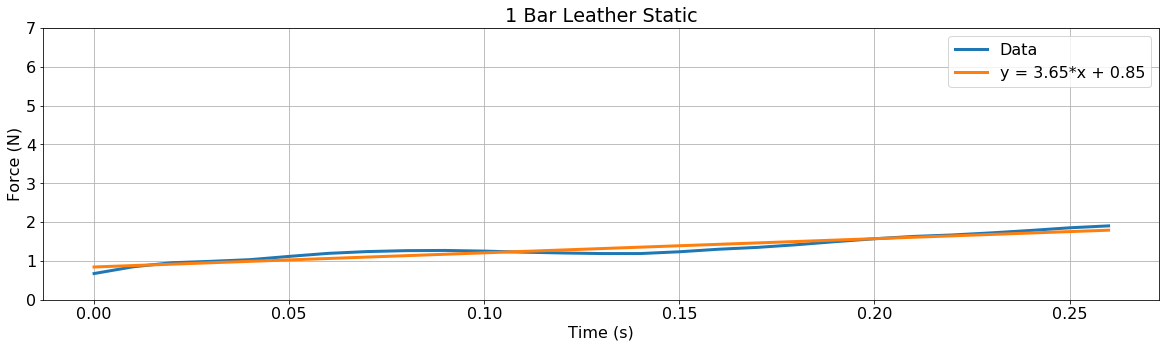

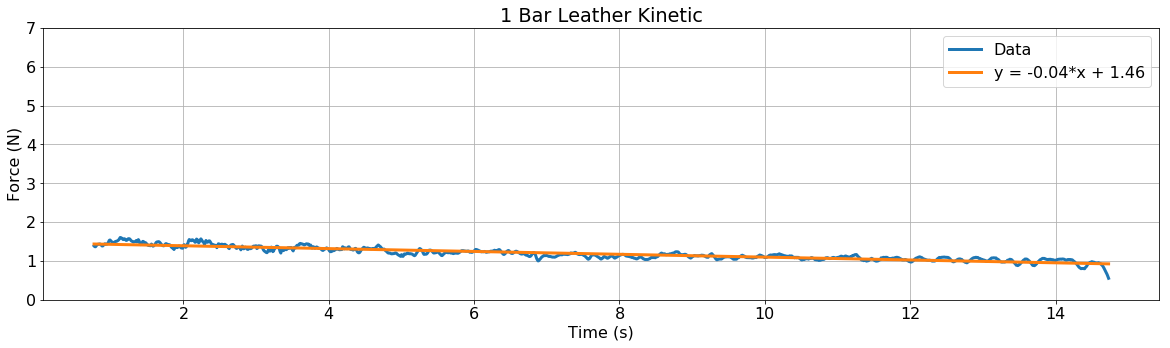

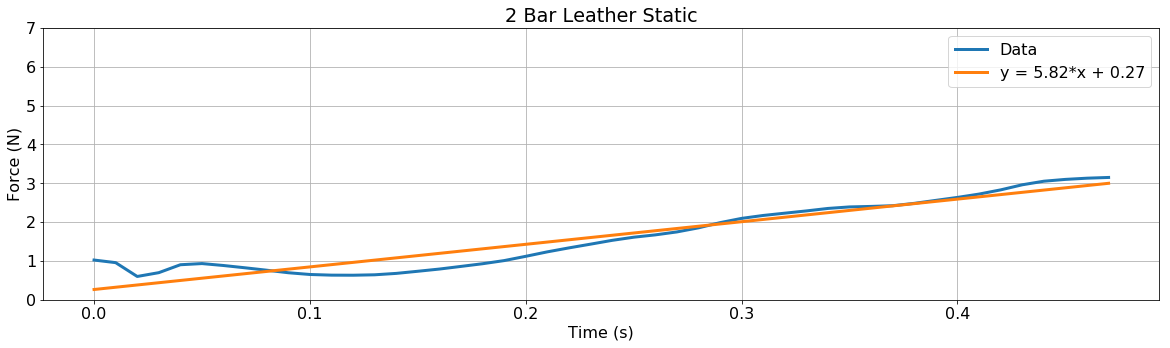

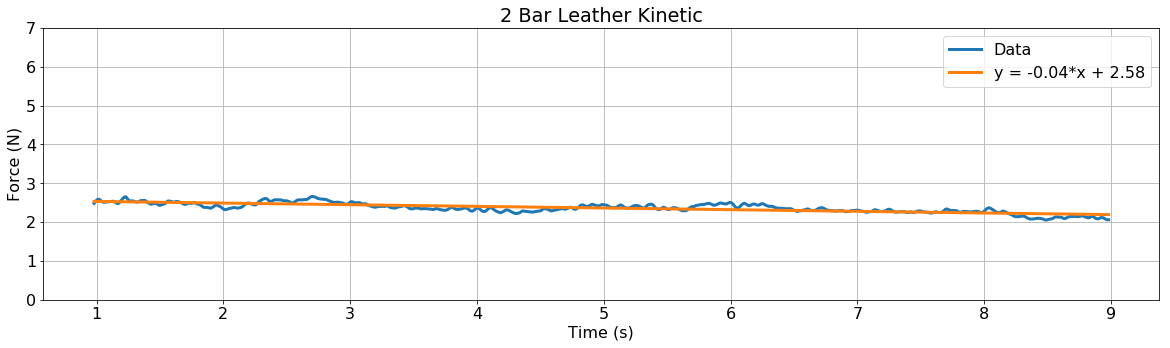

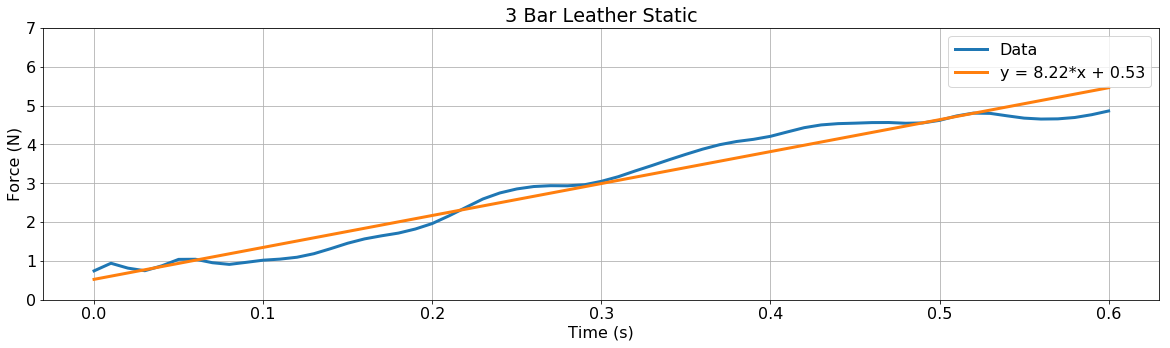

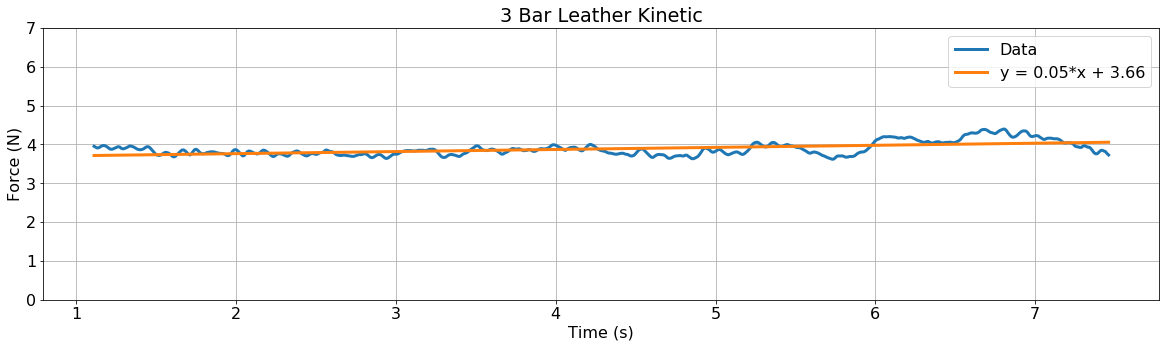

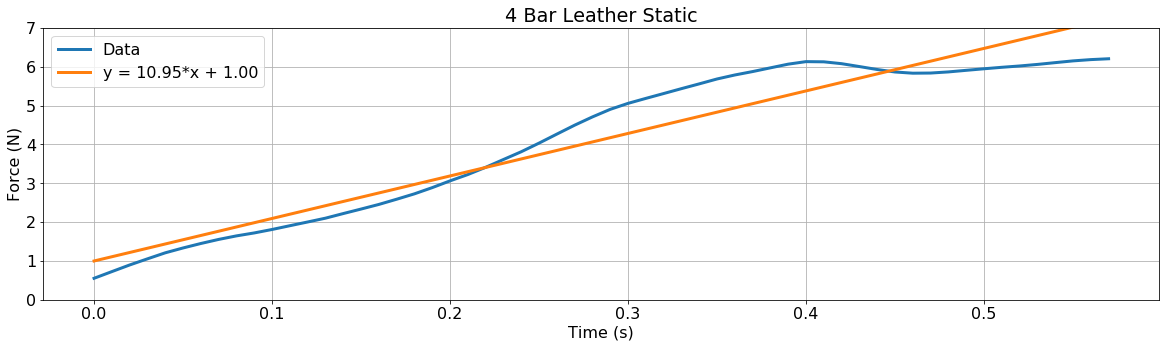

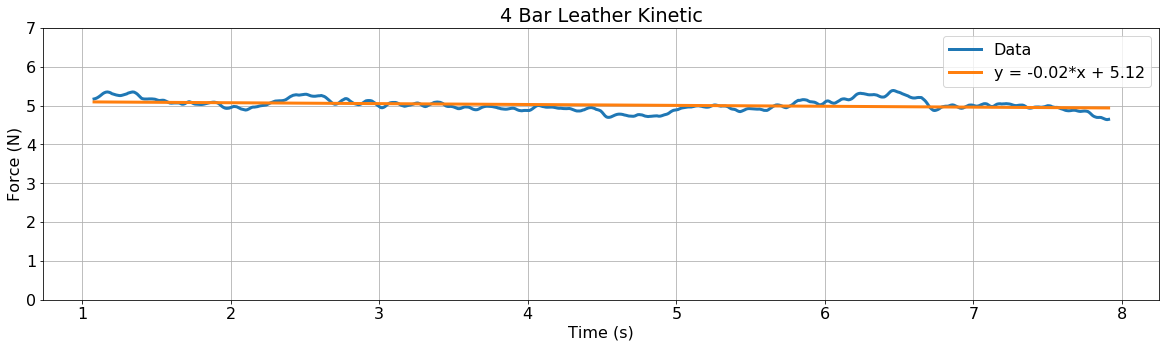

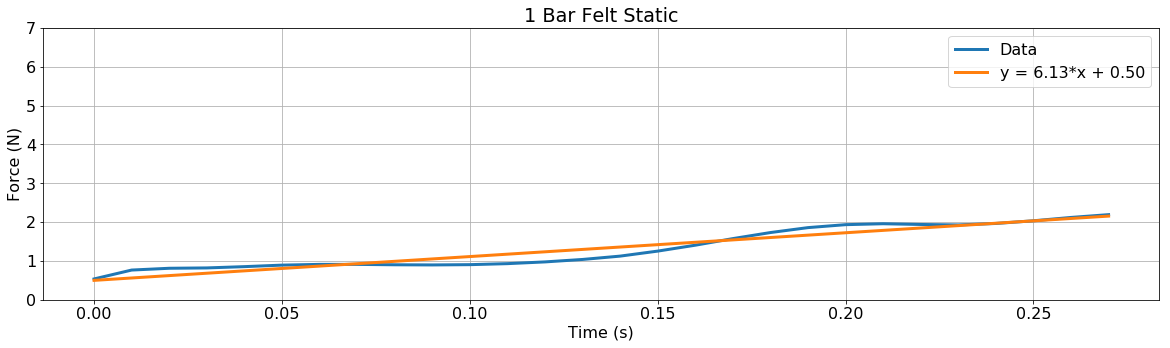

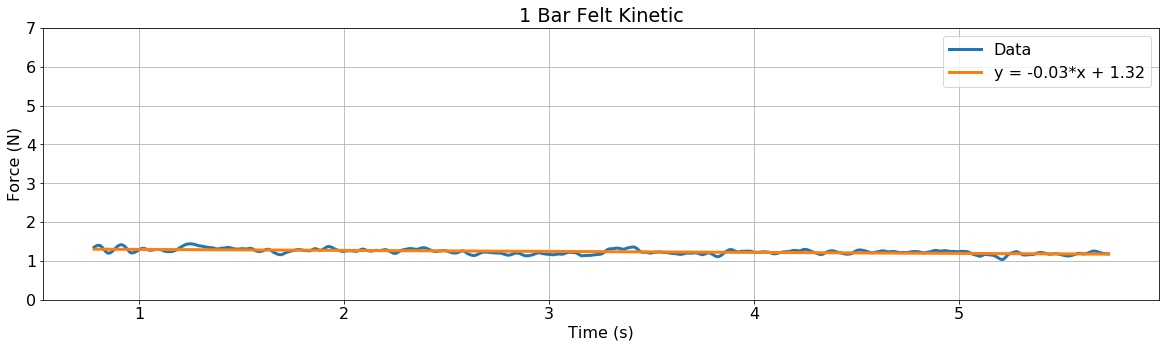

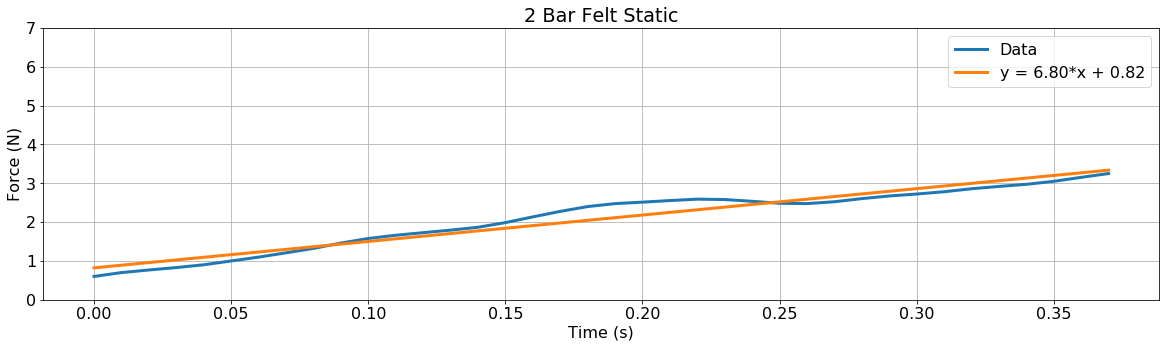

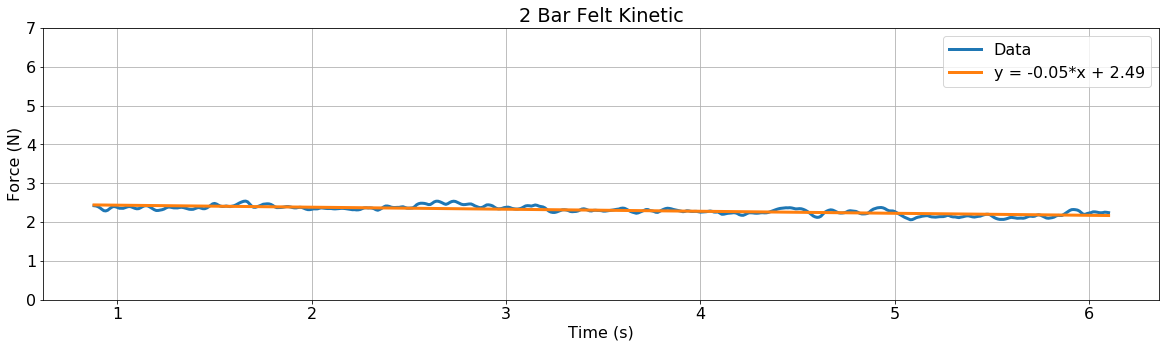

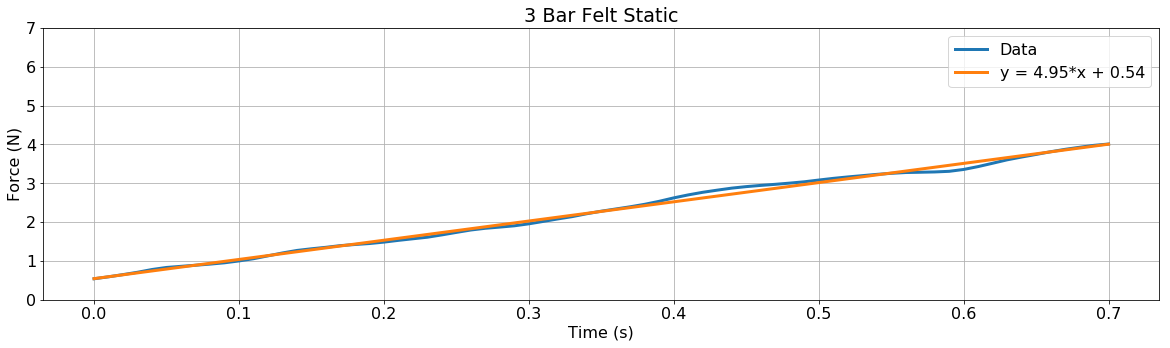

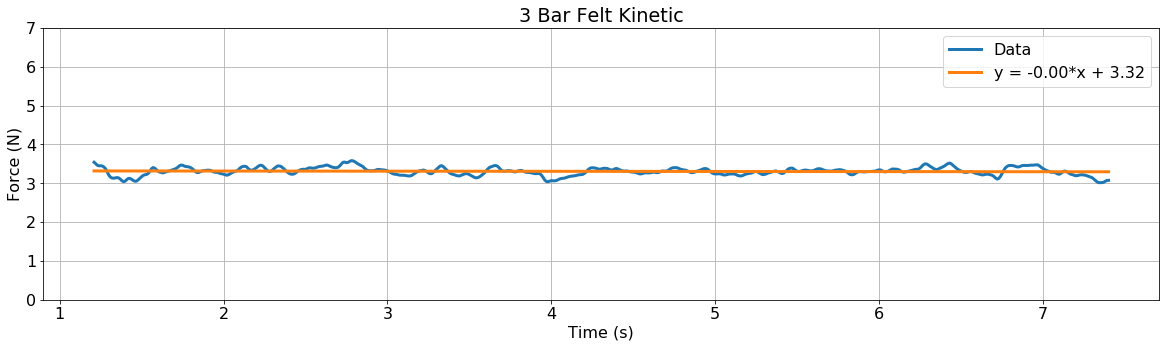

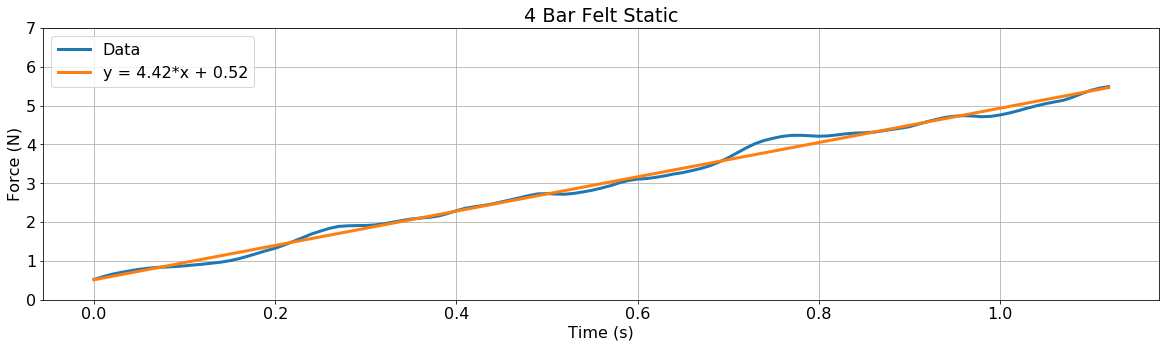

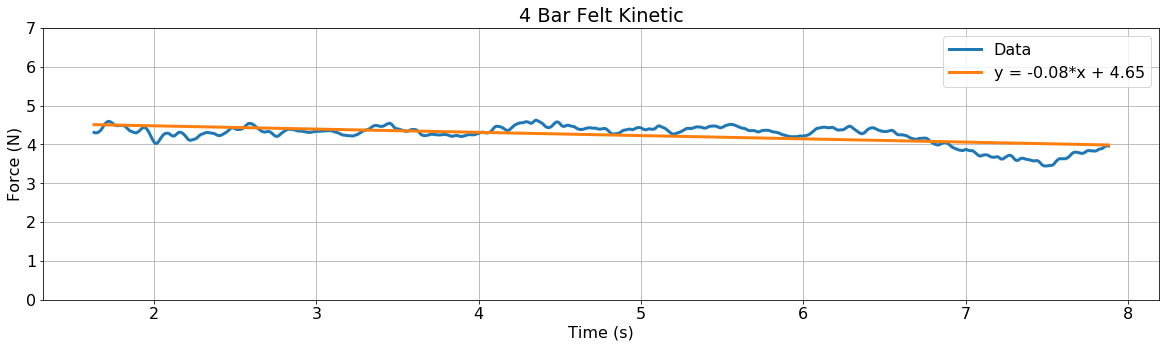

In [66]:
def linear_function(x, m, b):
    return m*x + b

for key in series:
    s = series[key]
    s_y = np.arange(s.shape[0])
    s_y = s_y / 100.
    
    argmax = np.argmax(s)
    
    
    reg = linear_model.LinearRegression()
    reg.fit(s_y[0:argmax].reshape((s_y[0:argmax].shape[0], 1)), s[0:argmax].reshape((s[0:argmax].shape[0], 1)))

    m = reg.coef_[0]
    b = reg.intercept_
    
    linear_line = np.zeros((s_y[0:argmax].shape[0]))
    for x_idx, x in enumerate(s_y[0:argmax]):
        linear_line[x_idx] = linear_function(x, m, b)
    
    plt.plot(s_y[0:argmax], s[0:argmax])
    plt.plot(s_y[0:argmax], linear_line)
    axes = plt.gca()
    axes.set_ylim([0, 7])
    plt.ylabel('Force (N)')
    plt.xlabel('Time (s)')
    
    legend_a = "y = %.2f*x + %.2f" % (m, b)
    legend_b = "Data"
    plt.legend([legend_b, legend_a])
    title = key + " Static"
    plt.title(title)
    plt.savefig(title)

    plt.show()
    
    reg = linear_model.LinearRegression()
    reg.fit(s_y[argmax+50:].reshape((s_y[argmax+50:].shape[0], 1)), s[argmax+50:].reshape((s[argmax+50:].shape[0], 1)))

    m = reg.coef_[0]
    b = reg.intercept_
    
    linear_line = np.zeros((s_y[argmax+50:].shape[0]))
    for x_idx, x in enumerate(s_y[argmax+50:]):
        linear_line[x_idx] = linear_function(x, m, b)
    
    axes = plt.gca()
    axes.set_ylim([0, 7])
    plt.plot(s_y[argmax+50:], s[argmax+50:])
    plt.plot(s_y[argmax+50:], linear_line)

    plt.ylabel('Force (N)')
    plt.xlabel('Time (s)')
    legend_a = "y = %.2f*x + %.2f" % (m, b)
    legend_b = "Data"
    plt.legend([legend_b, legend_a])
    title = key + " Kinetic"
    plt.title(title)
    plt.savefig(title)

    plt.show()



